<a href="https://colab.research.google.com/github/Aguilar78/Inteligencia-artificial-y-Redes-Neuronales/blob/main/ACTIVIDADES/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AF 7: Redes Neuronales Artificiales-LMV-N4-Grupo 008
Dario Israel Barrera Martinez 2067873

Arturo Estébanez Gómez Pérez 2127977

Jose Eduardo Aguilar Morales 2174012

Christopher Yair Lopez Zavala 2177846

Hector Alan Malagon Villareal 2178017

Ricardo Alfredo Zumaya Osorio 2178139

**1.- Cargar librerias**

In [1]:
# importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**2.- Cargar datos**

In [2]:
# 1. Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**3.- Preprocesamiento de datos**

In [3]:
# 2. Normalizar las imágenes (escalar valores de píxeles entre 0 y 1)
train_data = train_data / 255.0
test_data = test_data / 255.0

# 3. One-hot encoding de las etiquetas
train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)

**Ya con las imagenes preprocesadas, seleccionamos y entrenamos el modelo**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8657 - loss: 0.4687 - val_accuracy: 0.9558 - val_loss: 0.1473
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9649 - loss: 0.1198 - val_accuracy: 0.9684 - val_loss: 0.1088
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9771 - loss: 0.0750 - val_accuracy: 0.9692 - val_loss: 0.1074
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9809 - loss: 0.0588 - val_accuracy: 0.9748 - val_loss: 0.0885
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0422 - val_accuracy: 0.9697 - val_loss: 0.1012
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9767 - val_loss: 0.0868
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0263 - val_accuracy: 0.9712 - val_loss: 0.1191
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0251 - 

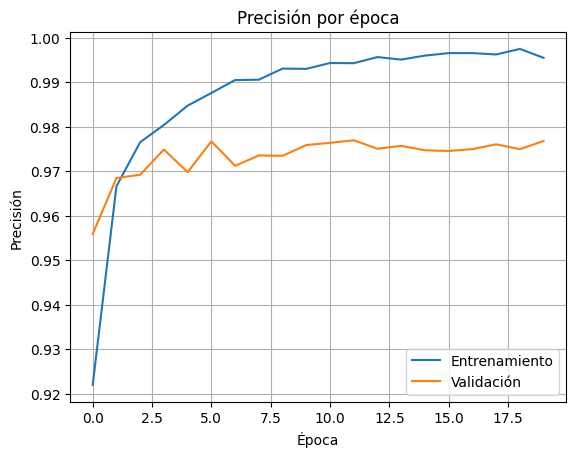

In [4]:
# 4. Definir el modelo (red neuronal artificial prealimentada)
modelo = Sequential([
    Flatten(input_shape=(28, 28)),          # Aplanar la imagen de entrada
    Dense(128, activation='relu'),          # Capa oculta con 128 neuronas
    Dense(64, activation='relu'),           # Otra capa oculta con 64 neuronas
    Dense(10, activation='softmax')         # Capa de salida para 10 clases
])

# 5. Compilar el modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# 6. Entrenar el modelo
history = modelo.fit(train_data, train_labels_cat,
                     epochs=20,
                     validation_split=0.2,
                     batch_size=32)

# 7. Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo.evaluate(test_data, test_labels_cat)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.4f}")

# 8. Guardar el modelo en formato .keras
modelo.save("modelo_mnist.keras")

# 9. Graficar precisión por época
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión por época')
plt.legend()
plt.grid()
plt.show()

**Ahora que nuestro modelo esta entrenado, pasaremos a hacer predicciones para cada una de las clases y asi podemos probar el modelo por nuestras propias manos y recursos**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

🖼️ Imagen #1
✔️ Valor real: 7
🔮 Predicción : 7


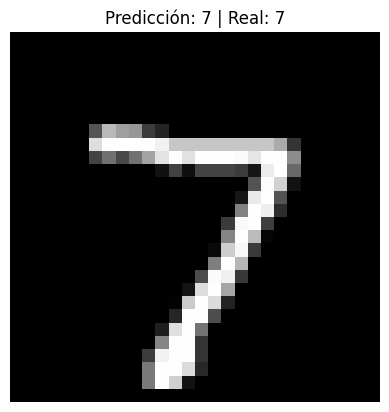

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

🖼️ Imagen #2
✔️ Valor real: 2
🔮 Predicción : 2


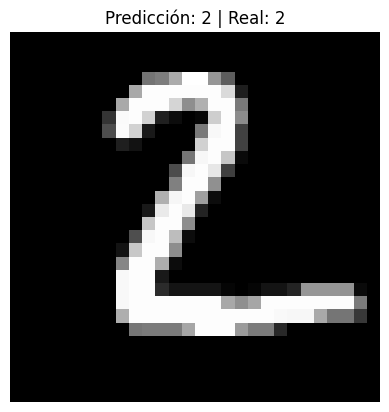

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

🖼️ Imagen #3
✔️ Valor real: 1
🔮 Predicción : 1


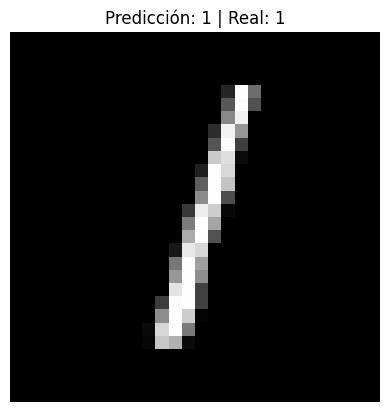

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

🖼️ Imagen #4
✔️ Valor real: 0
🔮 Predicción : 0


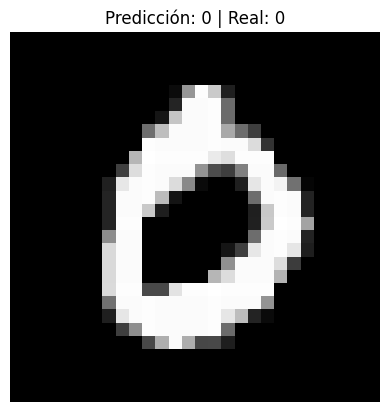

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

🖼️ Imagen #5
✔️ Valor real: 4
🔮 Predicción : 4


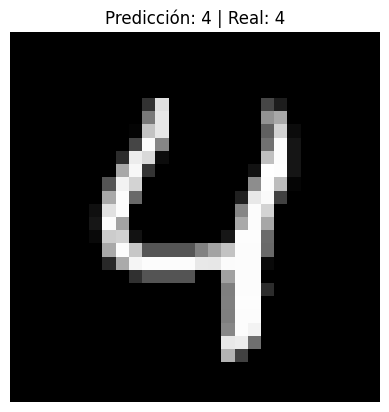

In [5]:
# --- Cargar modelo .keras ---
modelo = tf.keras.models.load_model("modelo_mnist.keras")

# --- Cargar datos de prueba ---
(_, _), (test_data, test_labels) = mnist.load_data()

# Normalizar imágenes (escala de 0 a 1)
test_data = test_data / 255.0

# Expandir dimensiones para incluir canal (28, 28) → (28, 28, 1)
test_data = np.expand_dims(test_data, axis=-1)

# --- Realizar 5 predicciones ---
for i in range(5):
    imagen = test_data[i:i+1]  # Imagen con batch size 1
    etiqueta_real = test_labels[i]

    pred = modelo.predict(imagen)
    clase_predicha = np.argmax(pred)

    # Mostrar resultados
    print(f"\n🖼️ Imagen #{i+1}")
    print(f"✔️ Valor real: {etiqueta_real}")
    print(f"🔮 Predicción : {clase_predicha}")

    plt.imshow(np.squeeze(imagen), cmap='gray')
    plt.title(f"Predicción: {clase_predicha} | Real: {etiqueta_real}")
    plt.axis('off')
    plt.show()